In [1]:
# This cell is used for creating a button that hides/unhides code cells to quickly look only the results.
# Works only with Jupyter Notebooks.

import os
from IPython.display import HTML

HTML('''<script>
code_show=true;
function code_toggle() {
if (code_show){
$('div.input').hide();
} else {
$('div.input').show();
}
code_show = !code_show
}
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [2]:
# Description:
#   Exercise7 notebook.
#
# Copyright (C) 2018 Santiago Cortes, Juha Ylioinas
#
# This software is distributed under the GNU General Public 
# Licence (version 2 or later); please refer to the file 
# Licence.txt, included with the software, for details.

# Preparations
import numpy as np

# Select data directory
if os.path.isdir('/coursedata'):
    # JupyterHub
    course_data_dir = '/coursedata'
elif os.path.isdir('../../../coursedata'):
    # Local installation
    course_data_dir = '../../../coursedata'
else:
    # Docker
    course_data_dir = '/home/jovyan/work/coursedata/'

print('The data directory is %s' % course_data_dir)
data_dir = os.path.join(course_data_dir, 'exercise-07-data')
print('Data stored in %s' % data_dir)

The data directory is /coursedata
Data stored in /coursedata/exercise-07-data


# CS-E4850 Computer Vision Exercise Round 7
The problems should be solved before the exercise session and solutions returned via
MyCourses. <br><br> For this exercise round, upload this notebook(pdf and .ipynb versions) containing your source codes (for Exercise 1) and your answer to the question of Exercise2, and all the answers to the questions of Exercise 3 (VGG practical), see part[1-3].ipynb. Note that it's not necessary to upload part1.ipynb, part2.ipynb or part3.ipynb, because all of the necessary questions related to them are contained in this notebook and you're not expected to do any coding in Exercises 2 and 3.

## Exercise 1 - Comparing  bags-of-words  with  tf-idf  weighting
Assume  that  we  have  an  indexed  collection  of  documents  containing  the  five  terms  of the following table where the second row indicates the percentage of documents in which each term appears.<br>

| term | cat | dog |mammals | mouse | pet |
| --- | :---: | :---: | :---: | :---: | :---: |
| **% of documents** | 5 | 20 | 2 | 10 | 60 |

Now, given the query $Q=\{mouse, cat, pet, mammals\}$, compute the similarity between $Q$ and the following example documents $D1$, $D2$, $D3$, by using the cosine similarity measure and tf-idf weights (i.e. term frequency - inverse document frequency) for the bag-of-words histogram representations of the documents and the query.

-  $D1$ = Cat is a pet, dog is a pet, and mouse may be a pet too.
-  $D2$ = Cat, dog and mouse are all mammals.
-  $D3$ = Cat and dog get along well, but cat may eat a mouse.

Ignore other words except the five terms. You may proceed with the following steps:

a) Compute and report the inverse document frequency (idf) for each of the five terms. Use the logarithm with base 2. (idf is the logarithm on slide 69 of Lecture 6.)<br>
b) Compute the term frequencies for the query and each document. <br>
c) Form the tf-idf weighted word occurrence histograms for the query and documents. <br>
d) Evaluate the cosine similarity between the query and each document (i.e.\ normalized scalar product between the weighted occurrence histograms as shown on slide 45).<br> 
e) Report the relative ranking of the documents. (You should get similarities 0.95, 0.64, and 0.63, but you need to determine which corresponds to which document.)<br>

### a)

Inverse document frequency formula:
$$\text{idf} = \log_2 \frac{N}{n_i} = \log_2 \frac{\text{Total number of documents in database}}{\text{Numbers of documents in database that word i appears in}}$$


In [3]:
## Comparing  bags-of-words  with  tf-idf  weighting
##--your-code-starts-here--##

idf = {}
doc_percentage = {"cat": 0.05, "dog": 0.2, "mammals": 0.02, "mouse": 0.1, "pet": 0.6}
for term in doc_percentage:
    idf[term] = np.log2(1/doc_percentage[term])
# print(idf)
for term in idf:
    print(f"Inverse document frequency of term '{term}': {idf[term]}")

##--your-code-ends-here--##

Inverse document frequency of term 'cat': 4.321928094887363
Inverse document frequency of term 'dog': 2.321928094887362
Inverse document frequency of term 'mammals': 5.643856189774724
Inverse document frequency of term 'mouse': 3.321928094887362
Inverse document frequency of term 'pet': 0.7369655941662062


### b)

Term frequency formula:
$$\text{tf} = \frac{n_{id}}{n_d} = \frac{\text{Number of occurrences of word i in document d}}{\text{Number of words in document d}}$$

In [4]:
## Comparing  bags-of-words  with  tf-idf  weighting
##--your-code-starts-here--##
import string

terms = ["cat", "dog", "mammals", "mouse", "pet"]

Q = "{mouse, cat, pet, mammals}"
D1 = "Cat is a pet, dog is a pet, and mouse may be a pet too."
D2 = "Cat, dog and mouse are all mammals."
D3 = "Cat and dog get along well, but cat may eat a mouse."

Q = Q.lower().translate(str.maketrans('', '', string.punctuation))
D1 = D1.lower().translate(str.maketrans('', '', string.punctuation))
D2 = D2.lower().translate(str.maketrans('', '', string.punctuation))
D3 = D3.lower().translate(str.maketrans('', '', string.punctuation))

def count_term(term, document):
    count = 0
    for word in document:
        if word == term:
            count+=1
    return count
    
def tf(terms, doc):
    split_doc = doc.split()
    doc_words = []
    for word in split_doc:
        if word in terms:
            doc_words.append(word)
    tf = {}
    n_d = len(doc_words)
    for term in terms:
        n_id = count_term(term, doc_words)
        tf[term] = n_id/n_d
    return tf

documents = [Q, D1, D2, D3]
documents_name = ["Q", "D1", "D2", "D3"]
for i in range(len(documents)):
    print(f"Term frequency for {documents_name[i]}: ")
    print(tf(terms, documents[i]))
    print()

##--your-code-ends-here--##

Term frequency for Q: 
{'cat': 0.25, 'dog': 0.0, 'mammals': 0.25, 'mouse': 0.25, 'pet': 0.25}

Term frequency for D1: 
{'cat': 0.16666666666666666, 'dog': 0.16666666666666666, 'mammals': 0.0, 'mouse': 0.16666666666666666, 'pet': 0.5}

Term frequency for D2: 
{'cat': 0.25, 'dog': 0.25, 'mammals': 0.25, 'mouse': 0.25, 'pet': 0.0}

Term frequency for D3: 
{'cat': 0.5, 'dog': 0.25, 'mammals': 0.0, 'mouse': 0.25, 'pet': 0.0}



### c)

Term frequency - inverse document frequency formula:
$$t_i = \text{tf} \times \text{idf} = \frac{n_{id}}{n_d} \log_2 \frac{N}{n_i}$$

Text(0.5, 1.0, 'tf-idf value for D3')

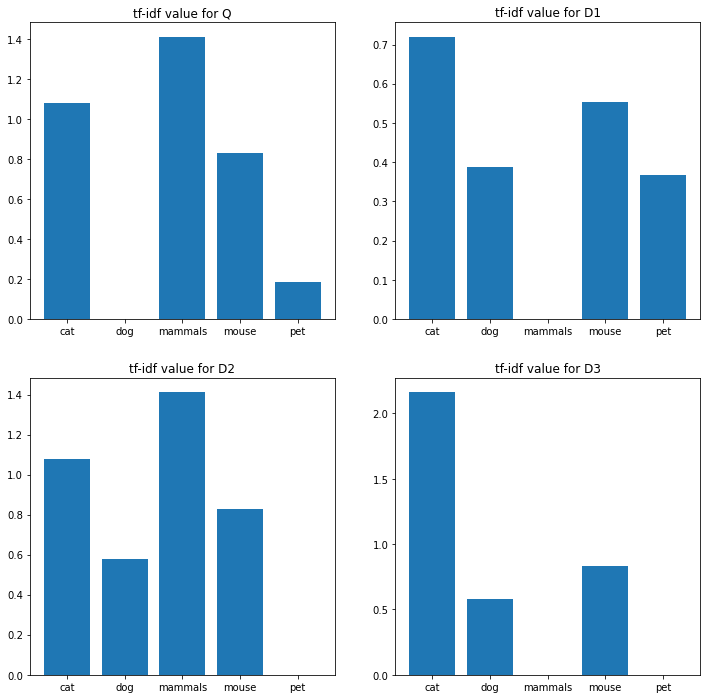

In [5]:
##Comparing  bags-of-words  with  tf-idf  weighting
##--your-code-starts-here--##
import matplotlib.pyplot as plt

documents_tf = {}
for i in range(len(documents)):
    documents_tf[documents_name[i]] = tf(terms, documents[i])
# print(documents_tf)
    
def tf_idf(tf, idf):
    tf_idf = {}
    for term in tf:
        tf_idf[term] = tf[term] * idf[term]
    return tf_idf

documents_tf_idf = {}
for doc in documents_name:
    documents_tf_idf[doc] = tf_idf(documents_tf[doc], idf)
# print(documents_tf_idf)
    
fig, axes = plt.subplots(figsize=(12,12), ncols=2, nrows=2)

for i in range(4):
    length = len(terms)
axes[0][0].bar(range(length), list(documents_tf_idf["Q"].values()), tick_label = terms)
axes[0][0].set_title("tf-idf value for Q")
axes[0][1].bar(range(length), list(documents_tf_idf["D1"].values()), tick_label = terms)
axes[0][1].set_title("tf-idf value for D1")
axes[1][0].bar(range(length), list(documents_tf_idf["D2"].values()), tick_label = terms)
axes[1][0].set_title("tf-idf value for D2")
axes[1][1].bar(range(length), list(documents_tf_idf["D3"].values()), tick_label = terms)
axes[1][1].set_title("tf-idf value for D3")

##--your-code-ends-here--##

### d)

Cosine similarity formula:
$$\text{sim}(d_j, q) = \frac{\langle d_j, q\rangle}{\lVert{d_j}\rVert \lVert{q}\rVert} $$

In [6]:
## Comparing  bags-of-words  with  tf-idf  weighting
##--your-code-starts-here--##
import math

def sim(que, doc):
    num = 0
    for word in que:
        num += doc[word] * que[word]
    det1 = 0
    det2 = 0
    for value in doc.values():
        det1 += value**2
    for value in que.values():
        det2 += value**2
    den = math.sqrt(det1) * math.sqrt(det2)
    return num/den

print("Cosine similarity between Q and D1:")
print(sim(documents_tf_idf['Q'], documents_tf_idf['D1']))

print("Cosine similarity between Q and D2:")
print(sim(documents_tf_idf['Q'], documents_tf_idf['D2']))

print("Cosine similarity between Q and D3:")
print(sim(documents_tf_idf['Q'], documents_tf_idf['D3']))
##--your-code-ends-here--##

Cosine similarity between Q and D1:
0.6288846426378089
Cosine similarity between Q and D2:
0.9546948111493487
Cosine similarity between Q and D3:
0.6431937393302419


### e)

Ranking of the documents based on similarities to query Q:
* Rank 1: D2 with approximate similarity 0.95
* Rank 2: D3 with approximate similarity 0.64
* Rank 3: D1 with approximate similarity 0.63

## Exercise 2 - Precision  and  recall
There is a database of 10000 images and a user, who is only interested in images which contain a car. It is known that there are 500 such images in the database. An  automatic image retrieval system retrieves 300 car images and 50 other images from the database. Determine and report the precision and recall of the retrieval  system in this particularcase.

Type your answer here:

* Relevant: 300
* Returned: 300 + 50 = 350
* Total relevant: 500

Therefore, we can calculate the precision and recall of the retrieval system:

$$ \text{Precision} = \frac{\text{relevant}}{\text{returned}} = \frac{300}{350} = 0.86 $$

$$ \text{Recall} = \frac{\text{relevant}}{\text{total relevant}} = \frac{300}{500} = 0.6 $$


## Exercise 3 - VGG practical on object instance recognition
See the questions in part[1-3].ipynb and write your answers here.

Part1:
Stage I.A (two questions)
Stage I.B (two questions)
Stage I.C (one question)

Part2 (one question)

Part3:
Stage III.A (three questions)
Stage III.B (one question)
Stage III.C (two questions)

Type your answers here:

### Part 1

#### Stage I.A

##### 1. 
The reason for the change in density of detections across the image most probably lies in the presence of a shaded section of the building in the lower left corner as well as the brightly illuminated part on the right side, while the original rotated version is quite uniformly lighted.

To detect the key features, we used the SIFT method, which works by measuring rapid local changes by a filter to get detections that are usually above a pre-defined threshold. Due to this method, it can be seen that there seem to be fewer detections obtained from the flat regions like the sky or the shaded region compared to the lighted regions with clearer edges and corners. However, this may not be a big problem for matching, since the key features are still detected pretty clearly. To avoid this situation, some solutions could be modifying the nearest neighbor searching algorithm i.e. the k-d tree algorithm, or adjusting the threshold for deciding detections.

##### 2. 
This situation can happen with image structures that have very few corners and edges or that are non-planar, since the projection of objects on 2D makes it difficult to determine real 3D points.


#### Stage I.B

##### 1. 
The descriptors are computed over a much larger region than the detection since the orientation histogram is calculated from a large neighborhood region around the key point. In the example, it seems like the neighborhood region is 16x16, dividing into samples of 4x4 regions.

##### 2. 
It seems that changing the lighting not a problem since SIFT is generally robust to changes in illumination, noise, or minor viewpoint changes. Some additional constraints to remove the mismatches may include the modification of the k-d tree algorithm for searching neighbors using best-bin-first search or Lowe's second nearest neighbor test.


#### Stage I.C

#####  1.
The Lowe algorithm rejects all matches with distance ratio larger than 0.8, therefore eliminates 90% of false matches and only throws 5% of correct matches. To remove the remaining mismatches, we can use the RANSAC algorithms, possibly with some modifications.

### Part 2

##### 1. 
The descriptors on these detections were calculated and matched by a process of detecting key features, fitting an affine transformation on neighboring regions, and checking SIFT matches by the transformation matrices previously. The descriptors undergo an affine transformation, which is presented by the ellipse-shaped regions on the images, so it can help detect matchings even in planer homography.

### Part 3

#### Stage III.A

##### 1.
From experimenting, it seems that significantly increasing or decreasing the vocabulary size does not greatly affect the returned matches by the descriptors, and the number of inliers also slightly changes accordingly. Overall, it seems that the size does not have a signigicant effect on the number of inliers and therefore the difficulty of computing the transformation.

##### 2.
The reason is that the conversion of descriptors into visual words has been pre-computed, so it is not accounted for as query time. 

##### 3.
It seems that the speed up time is proportional to the size of the database, it is reasonable to theorize the speedup is on some exponential or logarithmic scale.  


#### Stage III.B

##### 1.
There seems to be 25 mismatched images from the top results. The top image have a score of almost 1, probably because it was the same as the image used for querying the images (not a perfect 1 score because of Python implementation as explained in the notebook). 

#### Stage III.C

##### 1.

The score is much larger than 1 since the score is now the number of inlier matches.

##### 2. 

The retrieval results are improved quite clearly after geometric verification.